**Created on 11/01/2022**

**Group 2**

**Authors: Abdou SOW, Salomé VIENNET**

**License: this code is released under the CeCILL 2.1 license. See https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt**

## Import libraries

In [1]:
import os
import sys
import math
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [2]:
sns.set_style('darkgrid')

## Import data

In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M2/PIP 2023/Données/Data_development/train_v5.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M2/PIP 2023/Données/Data_development/test_v5.csv')
validation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M2/PIP 2023/Données/Data_development/validation_v5.csv')

In [5]:
Y_train = train[['loc_initiator_x', 'loc_initiator_y']]
X_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

Y_test = test[['loc_initiator_x', 'loc_initiator_y']]
X_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

Y_val = validation[['loc_initiator_x', 'loc_initiator_y']]
X_val = validation.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

## Predict

In [6]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
pred_test = reg.predict(X_test)
pred_val = reg.predict(X_val)

## Score

In [8]:
def score_distanceM(Xobserve:float, Yobserve:float, Xprevu:float, Yprevu:float) -> float:
    X=(Xobserve-Xprevu)**2
    Y=(Yobserve-Yprevu)**2
    return np.mean(np.sqrt(X+Y))

In [7]:
print("mae test : ", mean_absolute_error(Y_test, pred_test))
print("rmse test : ", np.sqrt(mean_squared_error(Y_test,pred_test)))
print("\n")
print("mae validation : ", mean_absolute_error(Y_val, pred_val))
print("rmse validation : ", np.sqrt(mean_squared_error(Y_val,pred_val)))

mae test :  2.0113484076027284
rmse test :  2.481710962027324


mae validation :  1.0573043891140488
rmse validation :  1.3273486764453581


In [9]:
print("score distance test : ",
      score_distanceM(Xobserve = Y_test['loc_initiator_x'],
                      Yobserve = Y_test['loc_initiator_y'],
                      Xprevu = pred_test[:,0],
                      Yprevu = pred_test[:,1]))

score distance test :  2.9588087426025087


In [10]:
print("score distance validation : ",
      score_distanceM(Xobserve = Y_val['loc_initiator_x'],
                      Yobserve = Y_val['loc_initiator_y'],
                      Xprevu = pred_val[:,0],
                      Yprevu = pred_val[:,1]))

score distance validation :  1.5553273514014943


In [ ]:
result = permutation_importance(reg, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=list(X_train.columns))

fig, ax = plt.subplots(figsize=(10, 7))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances of test using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

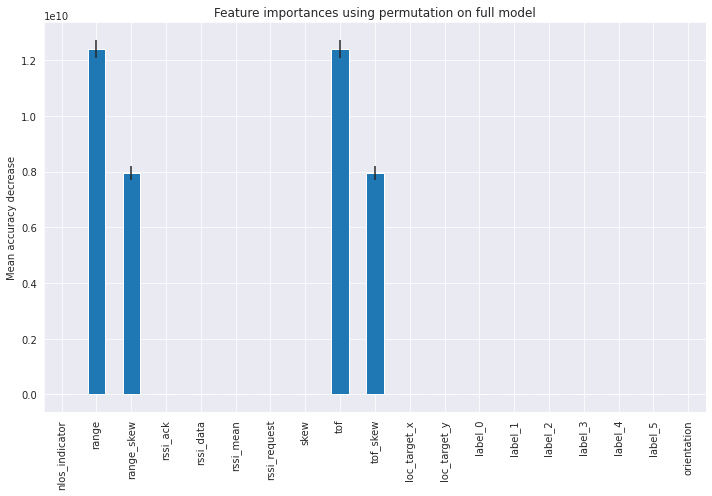

In [ ]:
result = permutation_importance(reg, X_val, Y_val, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=list(X_train.columns))

fig, ax = plt.subplots(figsize=(10, 7))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()